In [58]:
import numpy as np
import pandas as pd
import math
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import axes
import pickle
from datetime import datetime
from scipy import log,exp,sqrt,stats
print('Packages')

Packages


In [2]:
# Importing pickle file
data1 = np.load('/Users/louisribieras/Desktop/Invictus/Data/latest_coin_data.pkl')
data2 = np.load('/Users/louisribieras/Desktop/Invictus/Data/additional_data.pkl')

# Removing July dates from data1
data1 = data1.drop(data1.columns[0:4], axis = 1)

# Combining the two dataframes
data = pd.concat([data2, data1], axis = 1, join = 'outer', sort = True)

# Filling Nan values with 0
data = data.dropna()

# Saving original date index
date_index = data.columns

print('Loading of Data')
print('shape of data: ', data.shape)

Loading of Data
shape of data:  (127, 947)


In [3]:
data.head(3)

,"Aug 04, 2018","Aug 03, 2018","Aug 02, 2018","Aug 01, 2018","Jul 31, 2018","Jul 30, 2018","Jul 29, 2018","Jul 28, 2018","Jul 27, 2018","Jul 26, 2018",...,"Jan 10, 2016","Jan 09, 2016","Jan 08, 2016","Jan 07, 2016","Jan 06, 2016","Jan 05, 2016","Jan 04, 2016","Jan 03, 2016","Jan 02, 2016","Jan 01, 2016"
1337coin,"{'open_price': 0.000104, 'high_price': 0.00012...","{'open_price': 0.000117, 'high_price': 0.00012...","{'open_price': 0.000123, 'high_price': 0.00012...","{'open_price': 0.000133, 'high_price': 0.00013...","{'open_price': 0.00014, 'high_price': 0.000143...","{'open_price': 0.000142, 'high_price': 0.00015...","{'open_price': 0.000159, 'high_price': 0.00016...","{'open_price': 0.000156, 'high_price': 0.00016...","{'open_price': 0.000147, 'high_price': 0.00016...","{'open_price': 0.000162, 'high_price': 0.00017...",...,"{'open_price': 2.2e-05, 'high_price': 0.000147...","{'open_price': 1.9e-05, 'high_price': 2.3e-05,...","{'open_price': 1.2e-05, 'high_price': 1.9e-05,...","{'open_price': 1e-05, 'high_price': 1.8e-05, '...","{'open_price': 1.3e-05, 'high_price': 1.3e-05,...","{'open_price': 9e-06, 'high_price': 1.3e-05, '...","{'open_price': 1.3e-05, 'high_price': 1.3e-05,...","{'open_price': 1.3e-05, 'high_price': 1.3e-05,...","{'open_price': 1.3e-05, 'high_price': 1.7e-05,...","{'open_price': 9e-06, 'high_price': 1.7e-05, '..."
adzcoin,"{'open_price': 0.010969, 'high_price': 0.01174...","{'open_price': 0.011402, 'high_price': 0.0119,...","{'open_price': 0.01177, 'high_price': 0.012951...","{'open_price': 0.01231, 'high_price': 0.013095...","{'open_price': 0.013, 'high_price': 0.01513, '...","{'open_price': 0.013938, 'high_price': 0.01486...","{'open_price': 0.0139, 'high_price': 0.015288,...","{'open_price': 0.01581, 'high_price': 0.015875...","{'open_price': 0.01414, 'high_price': 0.015989...","{'open_price': 0.014954, 'high_price': 0.01722...",...,"{'open_price': 0.017934, 'high_price': 0.02196...","{'open_price': 0.017251, 'high_price': 0.02065...","{'open_price': 0.017775, 'high_price': 0.02238...","{'open_price': 0.027955, 'high_price': 0.03135...","{'open_price': 0.032065, 'high_price': 0.03431...","{'open_price': 0.024334, 'high_price': 0.03456...","{'open_price': 0.030147, 'high_price': 0.03202...","{'open_price': 0.033216, 'high_price': 0.03553...","{'open_price': 0.035203, 'high_price': 0.04120...","{'open_price': 0.030573, 'high_price': 0.04279..."
aeon,"{'open_price': 1.3, 'high_price': 1.32, 'low_p...","{'open_price': 1.35, 'high_price': 1.37, 'low_...","{'open_price': 1.44, 'high_price': 1.46, 'low_...","{'open_price': 1.45, 'high_price': 1.49, 'low_...","{'open_price': 1.63, 'high_price': 1.63, 'low_...","{'open_price': 1.68, 'high_price': 1.69, 'low_...","{'open_price': 1.67, 'high_price': 1.77, 'low_...","{'open_price': 1.62, 'high_price': 1.71, 'low_...","{'open_price': 1.56, 'high_price': 1.71, 'low_...","{'open_price': 1.64, 'high_price': 1.66, 'low_...",...,"{'open_price': 0.011206, 'high_price': 0.01120...","{'open_price': 0.012241, 'high_price': 0.01227...","{'open_price': 0.01331, 'high_price': 0.01491,...","{'open_price': 0.012896, 'high_price': 0.01352...","{'open_price': 0.013388, 'high_price': 0.01338...","{'open_price': 0.012555, 'high_price': 0.01339...","{'open_price': 0.013801, 'high_price': 0.01424...","{'open_price': 0.013874, 'high_price': 0.01537...","{'open_price': 0.015002, 'high_price': 0.01734...","{'open_price': 0.014429, 'high_price': 0.02169..."


In [4]:
print('Getting Market Caps')
# Initialize a close_price list
mc_list = list()
# Making a list of all close_prices
for date in data.index:
    for column in data.columns:
        mc_list.append(data[column][date]['market_cap'])

Getting Market Caps


In [5]:
print('Making Market Cap dataframe')
# Splitting list into 133 lists (one per coin)
mc_list = [mc_list[i:i+947] for i  in range(0, len(mc_list), 947)]   
# Making dataframe
mc_data = pd.DataFrame(data = mc_list, index = data.index, columns = data.columns)

Making Market Cap dataframe


In [6]:
mc_data.head(3)

,"Aug 04, 2018","Aug 03, 2018","Aug 02, 2018","Aug 01, 2018","Jul 31, 2018","Jul 30, 2018","Jul 29, 2018","Jul 28, 2018","Jul 27, 2018","Jul 26, 2018",...,"Jan 10, 2016","Jan 09, 2016","Jan 08, 2016","Jan 07, 2016","Jan 06, 2016","Jan 05, 2016","Jan 04, 2016","Jan 03, 2016","Jan 02, 2016","Jan 01, 2016"
1337coin,2726061.0,3068229.0,3238470.0,3475947.0,3682281.0,3737295.0,4182793.0,4084110.0,3855405.0,4237005.0,...,418.0,359.0,223.0,183.0,242.0,164.0,241.0,243.0,243.0,162.0
adzcoin,482515.0,501510.0,517771.0,541450.0,571739.0,612960.0,611210.0,695124.0,621686.0,657441.0,...,17456.0,16553.0,16866.0,26063.0,29340.0,21986.0,26662.0,28755.0,29917.0,25523.0
aeon,20567903.0,21383607.0,22725315.0,22957751.0,25737805.0,26672843.0,26386610.0,25677360.0,24770694.0,25962802.0,...,112095.0,122310.0,132819.0,128547.0,133294.0,124865.0,137105.0,137682.0,148680.0,142833.0


In [7]:
print('Getting Close Prices')
# Initialize a close_price list
cp_list = list()
# Making a list of all close_prices
for date in data.index:
    for column in data.columns:
        cp_list.append(data[column][date]['close_price'])

Getting Close Prices


In [8]:
print('Making Close Price dataframe')
# Splitting list into 133 lists (one per coin)
cp_list = [cp_list[i:i+947] for i  in range(0, len(cp_list), 947)]   
# Making dataframe
close_data = pd.DataFrame(data = cp_list, index = data.index, columns = data.columns)

Making Close Price dataframe


In [9]:
close_data.head(3)

,"Aug 04, 2018","Aug 03, 2018","Aug 02, 2018","Aug 01, 2018","Jul 31, 2018","Jul 30, 2018","Jul 29, 2018","Jul 28, 2018","Jul 27, 2018","Jul 26, 2018",...,"Jan 10, 2016","Jan 09, 2016","Jan 08, 2016","Jan 07, 2016","Jan 06, 2016","Jan 05, 2016","Jan 04, 2016","Jan 03, 2016","Jan 02, 2016","Jan 01, 2016"
1337coin,0.000106,0.000105,0.000117,0.000123,0.000133,0.000140,0.000142,0.000159,0.000155,0.000147,...,0.000019,0.000022,0.000019,0.000017,0.000010,0.000013,0.000009,0.000013,0.000013,0.000013
adzcoin,0.011384,0.010954,0.011403,0.011765,0.012299,0.013017,0.013930,0.013847,0.015778,0.014148,...,0.017920,0.017908,0.017245,0.017795,0.027896,0.032073,0.024340,0.030144,0.033206,0.035203
aeon,1.250000,1.300000,1.350000,1.430000,1.450000,1.630000,1.680000,1.660000,1.620000,1.570000,...,0.007307,0.011190,0.012237,0.013325,0.012869,0.013391,0.012555,0.013799,0.013870,0.015002


In [10]:
print('flipping the dates in order')
# Reording the date index
close_data = close_data[close_data.columns[::-1]]
mc_data = mc_data[mc_data.columns[::-1]]
data = data[data.columns[::-1]]

flipping the dates in order


In [11]:
print('Converting date index to datetime index')
# Index to Datetime index
mc_data.columns = pd.to_datetime(mc_data.columns)
close_data.columns = pd.to_datetime(close_data.columns)

Converting date index to datetime index


In [12]:
print('Share cap functions')

def share_cap_recurse(market_cap_list, num_coins, cap_ceiling_amount, final_cap_list):

    not_realloc_val = 0

    realloc_val = 0

    num_final = 0

    new_market_cap_list = []

    

    for i in range(0, len(market_cap_list)):

        if(market_cap_list[i] > cap_ceiling_amount):

            final_cap_list.append(cap_ceiling_amount)

            realloc_val += market_cap_list[i] - cap_ceiling_amount

            num_final += 1

        else:

            not_realloc_val += market_cap_list[i]

     

    if(num_final!=0):

        new_market_cap_list = [x * (1+(realloc_val/not_realloc_val)) for x in market_cap_list[num_final:]]

    else:

        new_market_cap_list = deepcopy(market_cap_list)

    

    if len(final_cap_list) == num_coins:

        return

    elif (new_market_cap_list[0] <= cap_ceiling_amount): #assumes ordered desc in market cap

        for cap in new_market_cap_list:

            final_cap_list.append(cap)

        return       

    else:

        share_cap_recurse(new_market_cap_list, num_coins, cap_ceiling_amount, final_cap_list)

        

def share_cap(market_cap_list, cap_ceiling_percent):  #CHANGE CAP CEILING HERE

    total_cap = sum(market_cap_list)

    cap_ceiling_amount = total_cap * cap_ceiling_percent

    final_cap_list = []

    

    share_cap_recurse(market_cap_list, len(market_cap_list), cap_ceiling_amount, final_cap_list)

    

    return (final_cap_list)

Share cap functions


In [13]:
print('Reverting Index code')
# Reverting Index code
# mc_data.columns = date_index
# close_data.columns = date_index

Reverting Index code


In [14]:
# Selecting dates and median market caps
selectedmarket = mc_data.copy()
selectedmarket = selectedmarket.loc[:, 'Jul 01, 2017':'Jul 01, 2018']
selectedmarket = selectedmarket.resample('W',axis=1).median()

# Selecting dates and median close price
selectedclose = close_data.copy()
selectedclose = selectedclose.loc[:, 'Jul 01, 2017':'Jul 01, 2018']
selectedclose = selectedclose.resample('W',axis=1).median()

# Calculating percent change for returns
selectedclose1 = selectedclose.copy().T
selectedreturns = selectedclose1.pct_change(1).T
selectedreturns.head()
print('selected market, selectedclose and selectedreturns')

selected market, selectedclose and selectedreturns


In [15]:
print('Total market cap movement for tethershare')
tmc_list = list()

for column in close_data.columns:
    tmc_list.append(close_data[column].sum())
    
tmc_data = pd.DataFrame(data = tmc_list, columns = ['total_mc'])
tmc_data.index = close_data.columns
tmc_pct = tmc_data.pct_change(1)

# Resampling the tmc data to get weekly
tmc_pct = tmc_pct.loc['Jul 01, 2017':'Jul 01, 2018',:]
tmc_pct = tmc_pct.resample('W').median()
tmc_pct_index = tmc_pct.index

tmc_pct.head(5)

Total market cap movement for tethershare


,total_mc
2017-07-02,-0.000156
2017-07-09,0.005873
2017-07-16,-0.038302
2017-07-23,0.053558
2017-07-30,-0.001593


In [16]:
num_index = np.arange(53)
tmc_pct.index = num_index

usdt_share = {}
usdt_share[0] = 0.10      #USDT starts off with ___% for the date


for i in tmc_pct.index[1:]:
    if tmc_pct['total_mc'][i] < -0.01:
        usdt_share[i] = usdt_share[i -1] - 3*(tmc_pct['total_mc'][i])
        if usdt_share[i] >= 0.5:
            usdt_share[i] = 0.5
    elif tmc_pct['total_mc'][i] > 0.01: 
        usdt_share[i] = usdt_share[i -1] - 3*(tmc_pct['total_mc'][i])
        if usdt_share[i] <= 0:
            usdt_share[i] = 0
    else:
        usdt_share[i] = usdt_share[i -1]

In [17]:
ilist = range(0, len(tmc_pct))

tethershare = {}
         
for (i, column) in zip(ilist, selectedmarket):
    tethershare[column] = usdt_share[i]
         
print('setting tethershare labels to match dates')

setting tethershare labels to match dates


In [18]:
# Calculating the returns on the tether held
usdt_close = pd.DataFrame(data = selectedclose.loc['tether'])
usdt_returns = usdt_close.pct_change(1)

In [19]:
print('loop for C10 with tether market cap function')
#FOR LOOP FOR C10 with tether
topmc10t = {}
sc10t = {}
tc10t = {}
ps10t = {}
invest10t = {}
returns10t = {}
lg_returns10t = {}
selectedmc10t = {}
topcoins10t = {}
c10sharet = {}
tetherreturns = {}

#for every date
for column in selectedmarket:
    #sort in descending order
    selectedmc10t[column] = selectedmarket[column].sort_values(ascending=False)
    
    #take the top coins
    topmc10t[column] = selectedmc10t[column].head(10)
    #take the index of the top coins
    topcoins10t[column] = topmc10t[column].index
    
    #get the share cap of the top 10
    sc10t[column] = share_cap(topmc10t[column], 0.15)      #CHOICE OF CAP CEILING
    
    #total cap of top 10
    tc10t[column] = sum(sc10t[column])
    
    #percentage of total fund allocated to tether/C10- NEW CODE!!
    c10sharet[column] = 1 - tethershare[column]
    
    #percentage share to be allocated for top 10 - NEW CODE!!!
    ps10t[column] = [x * c10sharet[column] / tc10t[column] for x in sc10t[column] ]
    
    #building dataframe of top20 coins by mc and %share to be invested
    invest10t[column] = pd.DataFrame()
    invest10t[column] = pd.DataFrame({'coin': topcoins10t[column], 'pct_share': ps10t[column]})
    invest10t[column] = invest10t[column].set_index('coin')
        
        
    #building dataframe of top 20 coins by mc and close price of that week
    for name in selectedreturns:
        returns10t[column] = pd.DataFrame()
        returns10t[column] = pd.DataFrame({'returns': selectedreturns[column]})
        returns10t[column] = returns10t[column].loc[topcoins10t[column]]
        
     #for loop to generate portfolio returns for a particular week
    portfolio_simple_returns10t = {}
    portfolio_total_returns10t = list()
   
    #tether returns
    tetherreturns[column] = tethershare[column]* usdt_returns.loc[column, 'tether']

    for i, df in invest10t.items():
        portfolio_simple_returns10t[i] = (invest10t[i].transpose().dot(returns10t[i])) + tetherreturns[i]
        portfolio_total_returns10t.append(portfolio_simple_returns10t[i]['returns'])      

loop for C10 with tether market cap function


In [20]:
print('cleaning tether results')
#FOR C10 compiling and cleaning the table into a readable format WITH TETHER
simple_returns10t = pd.DataFrame(data = portfolio_total_returns10t) 
simple_returns10t.columns = ['weekly_portfolio_simple_returns']
simple_returns10t['date'] = selectedreturns.T.index
simple_returns10t = simple_returns10t.set_index('date')

cleaning tether results


In [21]:
#FOR C10 with tether
final_cum10t = (1 + simple_returns10t).cumprod()
final_cum10t.index = pd.to_datetime(final_cum10t.index)

In [22]:
# formatting the final dataframes and then csv file (tether)
final_tether = simple_returns10t.merge(final_cum10t, how='outer', left_index=True, right_index=True)
final_tether.columns = ['weekly_simple_returns', 'cumulative_returns']
final_tether.at['2017-07-02', 'cumulative_returns'] = 1

In [23]:
#FOR LOOP FOR C10
topmc10 = {}
sc10 = {}
tc10 = {}
ps10 = {}
invest10 = {}
returns10 = {}
lg_returns10 = {}
selectedmc10 = {}
topcoins10 = {}
c10share = {}
tetherreturns = {}

#for every date
for column in selectedmarket:
    #sort in descending order
    selectedmc10[column] = selectedmarket[column].sort_values(ascending=False)
    
    #take the top coins
    topmc10[column] = selectedmc10[column].head(10)
    #take the index of the top coins
    topcoins10[column] = topmc10[column].index
    
    #get the share cap of the top 10
    sc10[column] = share_cap(topmc10[column], 0.15)      #CHOICE OF CAP CEILING
    
    #total cap of top 10
    tc10[column] = sum(sc10[column])
    
    #percentage of total fund allocated to tether/C10- NEW CODE!!
    #c10share[column] = 1 - tethershare[column]
    
    #percentage share to be allocated for top 20 - NEW CODE!!!
    ps10[column] = [x  / tc10[column] for x in sc10[column] ]
    
    #building dataframe of top20 coins by mc and %share to be invested
    invest10[column] = pd.DataFrame()
    invest10[column] = pd.DataFrame({'coin': topcoins10[column], 'pct_share': ps10[column]})
    invest10[column] = invest10[column].set_index('coin')
        
        
    #building dataframe of top 20 coins by mc and close price of that week
    for name in selectedreturns:
        returns10[column] = pd.DataFrame()
        returns10[column] = pd.DataFrame({'returns': selectedreturns[column]})
        returns10[column] = returns10[column].loc[topcoins10[column]]
        
     #for loop to generate portfolio returns for a particular week
    portfolio_simple_returns10 = {}
    portfolio_total_returns10 = list()

    for i, df in invest10.items():
        portfolio_simple_returns10[i] = (invest10[i].transpose().dot(returns10[i]))
        portfolio_total_returns10.append(portfolio_simple_returns10[i]['returns'])  

In [24]:
print('cleaning tether results')
#FOR C10 compiling and cleaning the table into a readable format WITHOUT TETHER
simple_returns10 = pd.DataFrame(data = portfolio_total_returns10) 
simple_returns10.columns = ['weekly_portfolio_simple_returns']
simple_returns10['date'] = selectedreturns.T.index
simple_returns10 = simple_returns10.set_index('date')

cleaning tether results


In [25]:
#FOR C10
final_cum10 = (1 + simple_returns10).cumprod()
final_cum10.index = pd.to_datetime(final_cum10.index)

In [26]:
# formatting the final dataframes and then csv file (C10)
final_c10 = simple_returns10.merge(final_cum10, how='outer', left_index=True, right_index=True)
final_c10.columns = ['weekly_simple_returns', 'cumulative_returns']
final_c10.at['2017-07-02', 'cumulative_returns'] = 1

In [27]:
final_tether.head(5)

,weekly_simple_returns,cumulative_returns
date,,
2017-07-02,NaN,1.000000
2017-07-09,0.066248,1.066248
2017-07-16,-0.153721,0.902343
2017-07-23,0.082812,0.977068
2017-07-30,0.000275,0.977336


In [28]:
final_c10.head(5)

,weekly_simple_returns,cumulative_returns
date,,
2017-07-02,NaN,1.000000
2017-07-09,0.075788,1.075788
2017-07-16,-0.195799,0.865149
2017-07-23,0.087721,0.941041
2017-07-30,0.000286,0.941310


In [33]:
tether_allocations = pd.DataFrame(data = usdt_share, index = num_index)
tether_allocations = tether_allocations.drop(tether_allocations.index[1:])
tether_allocations.columns = final_tether.index
tether_allocations = tether_allocations.T

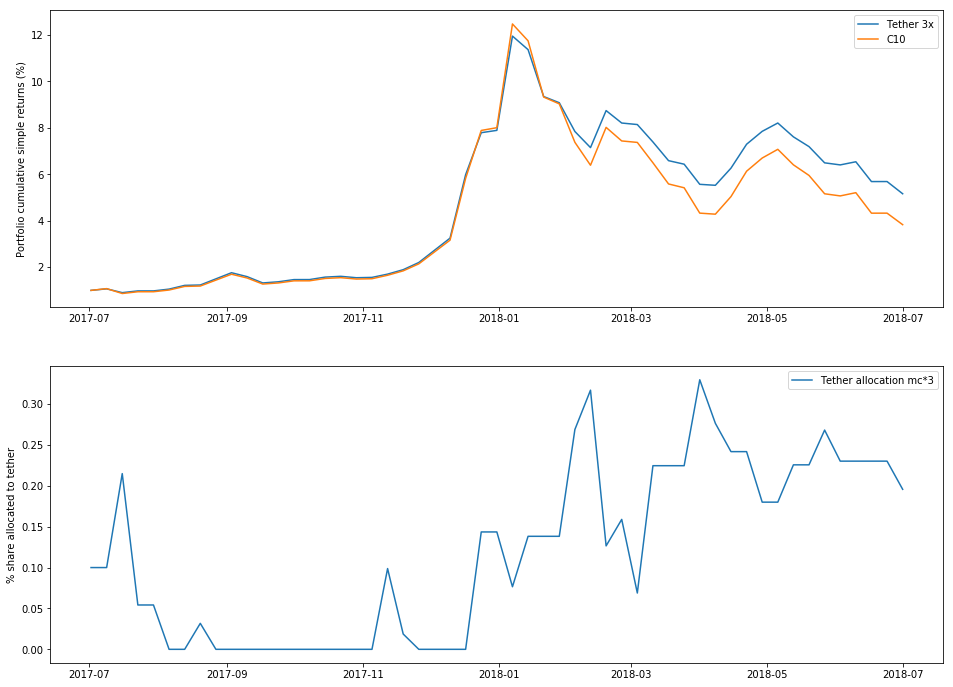

In [38]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))
ax2.plot(tether_allocations.index, tether_allocations, label = "Tether allocation mc*3")
ax2.set_ylabel('% share allocated to tether')

ax1.plot(final_tether.index, final_tether["cumulative_returns"], label = "Tether 3x")
ax1.plot(final_c10.index, final_c10["cumulative_returns"], label = "C10")
ax1.set_ylabel('Portfolio cumulative simple returns (%)')

ax2.legend()
ax1.legend()

plt.show()

In [39]:
final_tether.to_csv("C10 tether 3x.csv")

In [47]:
data1x = pd.read_csv('/Users/louisribieras/Desktop/Invictus/C10 vs tether/USDT_Strategy/Tether_finals/graphs & CSVs/C10 tether 1x.csv')
data2x = pd.read_csv('/Users/louisribieras/Desktop/Invictus/C10 vs tether/USDT_Strategy/Tether_finals/graphs & CSVs/C10 tether 2x.csv')
data3x = pd.read_csv('/Users/louisribieras/Desktop/Invictus/C10 vs tether/USDT_Strategy/Tether_finals/graphs & CSVs/C10 tether 3x.csv')
datac10 = pd.read_csv('/Users/louisribieras/Desktop/Invictus/C10 vs tether/USDT_Strategy/Tether_finals/graphs & CSVs/C10 no tether.csv')

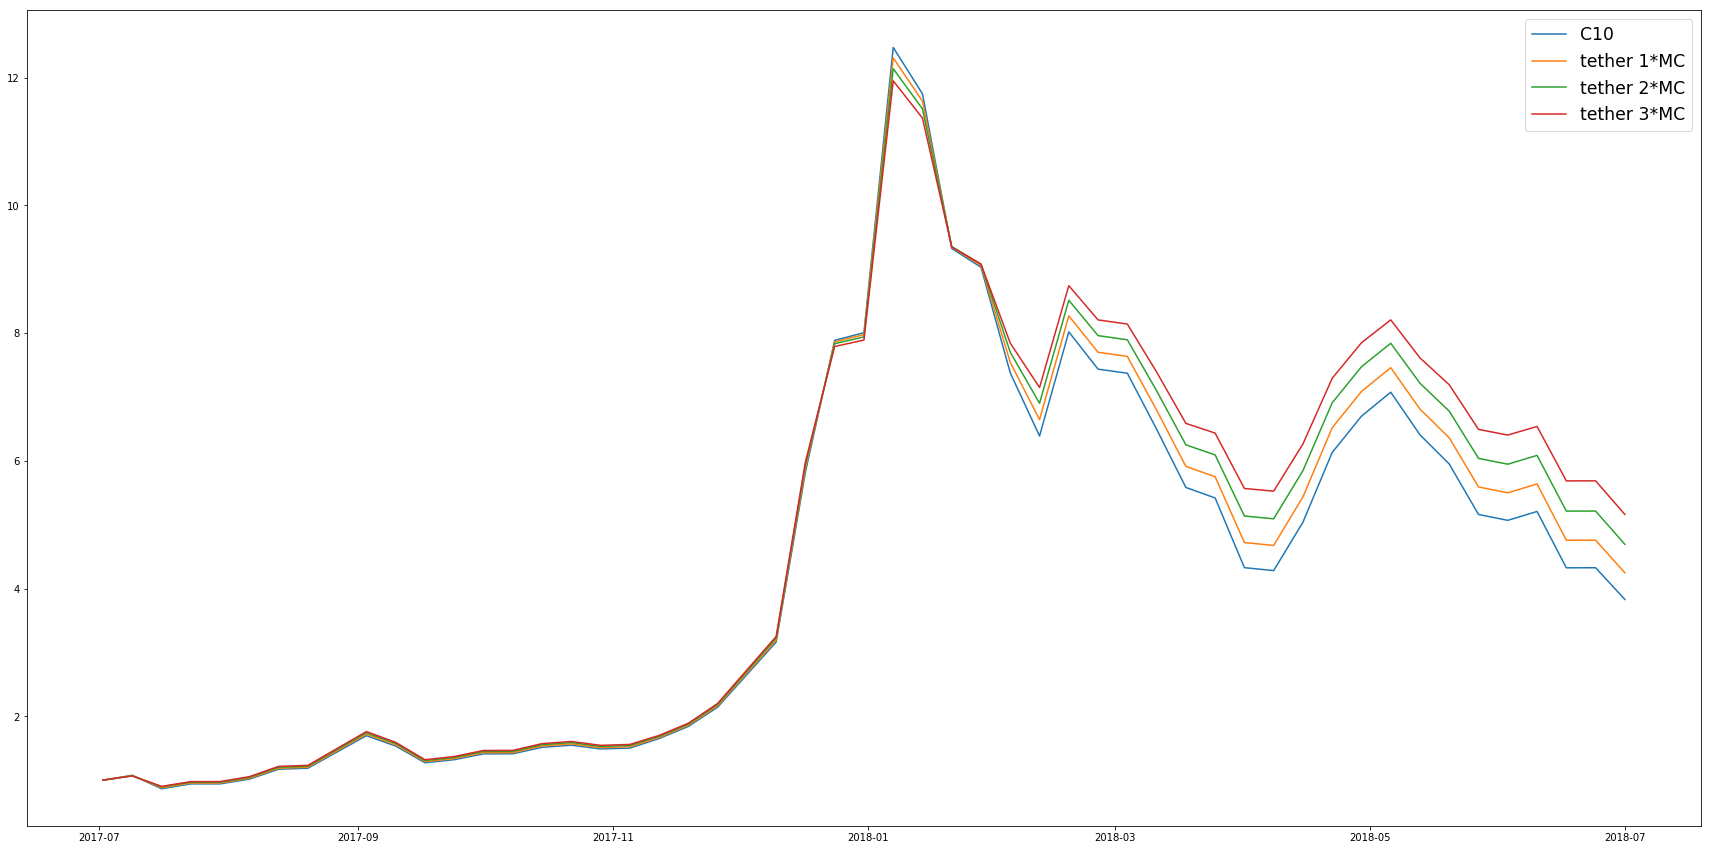

In [69]:

plt.rcParams['figure.figsize'] = (30,15)
plt.plot(final_c10.index, final_c10["cumulative_returns"], label = "C10")
plt.plot(final_c10.index, data1x["cumulative_returns"], label = "tether 1*MC")
plt.plot(final_c10.index, data2x["cumulative_returns"], label = "tether 2*MC")
plt.plot(final_c10.index, data3x["cumulative_returns"], label = "tether 3*MC")
plt.legend(fontsize = 'xx-large')